# Определение перспективного тарифа для телеком-компании

# Содержание

Часть 1. Описание проекта.<br>
* 1. Описание исследования.
* 2. Цель исследования.

Часть 2. Подготовка данных.<br>

* 1. Изучение предоставленных данных.
* 2. Поиск дубликатов.
* 3. Обработка аномальных значений.
* 4. Редактирование типов данных.

Часть 3. Расчет месячных трат и добавление результатов в таблицы.<br>

* 1. Расчет количества звонков и минут разговора.
* 2. Расчет количества сообщений.
* 3. Расчет интернет-трафика.
* 4. Расчет помесячной выручки.

Часть 4. Анализ данных.<br>

* 1. Описание поведения клиентов. 

Часть 5. Проверка гипотез.<br>

* 1. Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются". 
* 2. Гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".

Часть 6. Подведение итогов.<br>

* 1. Общий вывод по исследованию. 

## Часть. Описание проекта.

### Описание исследования.

Имеется выборка данных в виде 500 пользователей компании «Мегалайна» - федерального оператора сотовой связи. Данные содержат информацию о пользователях, их тарифах и действиях за 2018 года. 
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 

**Тариф «Смарт»**

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

### Цель исследования.

Провести анализ поведения клиентов и сделать вывод — какой тариф приносит больше денег.

## Часть. Подготовка данных.

### Изучение предоставленных данных.

In [1]:
# Подключение библиотек
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from scipy import stats as st

# Отключение ошибок
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.float_format', '{:,.2f}'.format)

# Функция для вывода основных данных по датасету
def all_info(data):
    data.info() #вывод общей информации
    display(data.head(10)) #вывод первых 10 значений
    display(data.describe()) #вывод описательной статистики по датасету
    display(data.isna().mean().apply('{:.2%}'.format)) #подсчет пропусков в датасете в %
    
# Чтение файлов с данными
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [2]:
# Вывод общей информации по таблице "Звонки" 
print("Звонки")
all_info(calls)

Звонки
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


id           0.00%
call_date    0.00%
duration     0.00%
user_id      0.00%
dtype: object

In [3]:
# Вывод общей информации по таблице "Интернет" 
print("Интернет")
all_info(internet)

Интернет
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,Unnamed: 0,mb_used,user_id
count,"149,396.00","149,396.00","149,396.00"
mean,"74,697.50",370.19,"1,252.10"
std,"43,127.05",278.30,144.05
min,0.00,0.00,"1,000.00"
25%,"37,348.75",138.19,"1,130.00"
50%,"74,697.50",348.01,"1,251.00"
75%,"112,046.25",559.55,"1,380.00"
max,"149,395.00","1,724.83","1,499.00"


Unnamed: 0      0.00%
id              0.00%
mb_used         0.00%
session_date    0.00%
user_id         0.00%
dtype: object

In [4]:
# Вывод общей информации по таблице "Сообщения" 
print("Сообщения")
all_info(messages)

Сообщения
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,user_id
count,"123,036.00"
mean,"1,256.99"
std,143.52
min,"1,000.00"
25%,"1,134.00"
50%,"1,271.00"
75%,"1,381.00"
max,"1,499.00"


id              0.00%
message_date    0.00%
user_id         0.00%
dtype: object

In [5]:
# Вывод общей информации по таблице "Тарифы" 
print("Тарифы")
all_info(tariffs)

Тарифы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.00,2.00,2.00,2.00,2.00,2.00,2.00
mean,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00
std,671.75,"10,861.16","1,767.77",989.95,35.36,1.41,1.41
min,50.00,"15,360.00",500.00,550.00,150.00,1.00,1.00
25%,287.50,"19,200.00","1,125.00",900.00,162.50,1.50,1.50
50%,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00
75%,762.50,"26,880.00","2,375.00","1,600.00",187.50,2.50,2.50
max,"1,000.00","30,720.00","3,000.00","1,950.00",200.00,3.00,3.00


messages_included        0.00%
mb_per_month_included    0.00%
minutes_included         0.00%
rub_monthly_fee          0.00%
rub_per_gb               0.00%
rub_per_message          0.00%
rub_per_minute           0.00%
tariff_name              0.00%
dtype: object

In [6]:
# Вывод общей информации по таблице "Пользователи" 
print("Пользователи")
all_info(users)

# Переименуем колонку "Тариф" для удобства
users.rename(columns={'tariff':'tariff_name'}, inplace=True)

Пользователи
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


user_id        0.00%
age            0.00%
churn_date    92.40%
city           0.00%
first_name     0.00%
last_name      0.00%
reg_date       0.00%
tariff         0.00%
dtype: object

**Вывод**

На первый взгляд в данных нет пропусков, кроме колонки `'churn_date'` в таблице пользователей. Пропуски в данных обусловлены тем, что пользователи пользуются выбранным тарифом на момент выгрузки данных.

Таблица "Интернет" содержит столбец "Unnamed: 0", который не несет никакой информации, кроме дублирования индексов таблицы, соответственно его можно будет удалить.

Колонка "Дата" во всех таблицах, где она есть, имеет тип данных object, следует перевести дату в соответсвующий тип.

### Поиск дубликатов

Для поиска явных дубликатов воспользуемся методом duplicated().

In [7]:
#Количество дубликатов в таблице "Звонки"
print(calls.duplicated().sum())

#Количество дубликатов в таблице "Интернет"
print(internet.duplicated().sum())

#Количество дубликатов в таблице "Сообщения"
print(messages.duplicated().sum())

#Количество дубликатов в таблице "Пользователи"
print(users.duplicated().sum())

0
0
0
0


**Вывод**

Явных дубликатов в таблицах нет.

### Аномальные значения

При первичном осмотре метод describe() был применен для оценки основных параметров, где могут наблюдаться аномальные или нелогичные значения, например, возраст 143 года. Аномальных значений нет.

Избавимся от колонки "Unnamed: 0" в таблице "Интернет" с помощью метода drop().

In [8]:
# Избавляемся от колонки
internet.drop(columns=['Unnamed: 0'], inplace=True)

# Проверка результата
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


**Вывод**

Аномальных значений не обнаружено, лишняя колонка удалена.

### Редактирование типов данных.

Как было замечено ранее, во всех таблицах колдонка "Дата" имеет тип object. Для перевода воспользуемся методом to_datetime().

In [9]:
# Переводим значения в колонках "Дата" во всех таблицах
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# Проверка результата
print(calls.info())
print(messages.info())
print(internet.info())
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395

**Вывод**

Проведено изменение типов данных для колонок "Дата" во всех таблицах.

## Часть. Расчет месячных трат и добавление результатов в таблицы

### Расчет количества звонков и минут разговора.

Чтобы выполнить помесячный расчет количества звонков и минут разговора создадим отдельную колонку "month", в которой будем хранить значение месяца. Также округлим каждый звонок в большую сторону, т.к. «Мегалайн» всегда округляет секунды до минут, каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. После выделения месяца и округления длительности звонков можно создать сводную таблицу, которая как раз и будет отображать помесячное количество звонков и их суммарную длительность.

In [10]:
# Создаем колонку "Месяц"
calls['month'] = calls['call_date'].dt.strftime('%m').astype('str').astype('int')

# Округляем звонки
calls['duration'] = np.ceil(calls['duration'])

# Создаем сводную таблицу с количеством сделанных звонков и израсходованных минут по месяцам для каждого пользователя
piv_calls = calls.pivot_table(index=['user_id', 'month'], values= 'duration', aggfunc=['sum', 'count'])
# Переименуем колонки в таблице
piv_calls.columns = ['calls_duration', 'calls_count']
# Проверка результата
display(piv_calls)

calls_duration  calls_count
user_id month                             
1000    5              159.00           22
        6              172.00           43
        7              340.00           47
        8              408.00           52
        9              466.00           58
...                       ...          ...
1498    10             247.00           41
1499    9               70.00            9
        10             449.00           68
        11             612.00           74
        12             492.00           69

[3174 rows x 2 columns]

### Расчет количества сообщений

Для расчета количества сообщений поступим таким же образом, как и при расчете длительности и количества звонков.

In [11]:
# Создаем колонку "Месяц" 
messages['month'] = messages['message_date'].dt.strftime('%m').astype('str').astype('int')

# Создаем сводную таблицу с количеством сообщений по месяцам для каждого пользователя
piv_messages = messages.pivot_table(index=['user_id', 'month'], values= 'message_date', aggfunc='count')
# Переименуем колонки в таблице
piv_messages.columns = ['messages_count']
# Проверка результата
display(piv_messages)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

### Расчет интернет-трафика.

Аналогичным образом рассчитаем интернет-трафик.

In [12]:
# Cоздаем колонку "Месяц"
internet['month'] = internet['session_date'].dt.strftime('%m').astype('str').astype('int')

# Создаем сводную таблицу с интернет-трафиком по месяцам для каждого пользователя
piv_internet = internet.pivot_table(index=['user_id', 'month'], values= 'mb_used', aggfunc='sum')
# Переименуем колонки в таблице
piv_internet.columns = ['mb_used']
# Проверка результата
display(piv_internet)

mb_used
user_id month          
1000    5      2,253.49
        6     23,233.77
        7     14,003.64
        8     14,055.93
        9     14,568.91
...                 ...
1498    10    20,579.36
1499    9      1,845.75
        10    17,788.51
        11    17,963.31
        12    13,055.58

[3203 rows x 1 columns]

### Расчет помесячной выручки.

Для расчета выручки выполним следующие действия:
1. Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика
2. Остаток умножим на значение из тарифного плана
3. К полученному значению прибавим  абонентскую плату, соответствующую тарифному плану.

Для начала, чтобы посчитать выручку, объединим все таблицы в одну.

In [13]:
# Соединим все таблицы методом merge()
data = piv_calls.merge(piv_messages, on=['user_id', 'month'], how='outer')
data.drop(axis=1, columns='calls_count', inplace=True)
data = data.merge(piv_internet, on=['user_id', 'month'], how='outer')
data.reset_index(inplace=True)

# Добавим данные из таблиц "Пользователи" и "Тарифы", при этом удалим лишние колонки
data = data.merge(users, on='user_id')
data.drop(axis=1, columns=['churn_date','last_name','first_name','reg_date','age'], inplace=True)
data = data.merge(tariffs, on='tariff_name')
data.sort_values(by=['user_id', 'month'], inplace=True)
data.reset_index(drop=True, inplace=True)

Затем добавим в общую таблицу колонку "Выручка", где будем хранить результат.

In [14]:
# Добавляем в общую таблицу колонку "Выручка"
data['revenue'] = 0

Запускаем цикл, в котором проводим расчет месячной выручки.

In [15]:
# Запустим цикл по всей таблице
for i in range(len(data)):
    
    # учет длительности звонков
    call = 0 
    # учет сообщений
    mes = 0 
    # учет трафика
    traf = 0 
    # Расчет стоимости звонков
    if (data['minutes_included'][i] - data['calls_duration'][i]) < 0:
        call = abs(data['minutes_included'][i] - data['calls_duration'][i])
        call = mt.ceil(call) * data['rub_per_minute'][i]
    # Расчет стоимости сообщений  
    if (data['messages_included'][i] - data['messages_count'][i]) < 0:
        mes = abs(data['messages_included'][i] - data['messages_count'][i])
        mes = mes * data['rub_per_message'][i]
    # Расчет стоимости трафика   
    if (data['mb_per_month_included'][i] - data['mb_used'][i]) < 0:
        traf = abs(data['mb_per_month_included'][i] - data['mb_used'][i]) / 1024
        traf = mt.ceil(traf) * data['rub_per_gb'][i]
    # Расчет выручки   
    data['revenue'][i] = call + mes + traf + data['rub_monthly_fee'][i]

Избавимся от лишней информации в полученной таблице.

In [16]:
# Удалим лишние столбцы
data.drop(axis=1, columns=['messages_included','mb_per_month_included',
                           'minutes_included','rub_monthly_fee','rub_per_gb',
                           'rub_per_message','rub_per_minute'], inplace=True)
# Проверим результат
display(data)

,user_id,month,calls_duration,messages_count,mb_used,city,tariff_name,revenue
0,1000,5,159.00,22.00,"2,253.49",Краснодар,ultra,1950
1,1000,6,172.00,60.00,"23,233.77",Краснодар,ultra,1950
2,1000,7,340.00,75.00,"14,003.64",Краснодар,ultra,1950
3,1000,8,408.00,81.00,"14,055.93",Краснодар,ultra,1950
4,1000,9,466.00,57.00,"14,568.91",Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...
3209,1498,10,247.00,42.00,"20,579.36",Владикавказ,smart,1750
3210,1499,9,70.00,11.00,"1,845.75",Пермь,smart,550
3211,1499,10,449.00,48.00,"17,788.51",Пермь,smart,1150
3212,1499,11,612.00,59.00,"17,963.31",Пермь,smart,1513


**Вывод**

Выполнен расчет помесячной выручки с каждого клиента.

## Часть. Анализ данных.

### Описание поведения клиентов.

На основе полученной таблицы рассмотрим поведение клиентов, а именно сколько минут, сообщений и интернет-трафика используют клиенты каждого тарифа. Для этого создадим таблицу, в которых отобразим среднее, дисперсию и стандартное отклонение по каждому параметру.

In [17]:
# Создаем сводную таблицу
behavior_data = data.pivot_table(index=['tariff_name', 'month'],
                             values= ['calls_duration', 'messages_count', 'mb_used'], 
                             aggfunc=['mean', 'var', 'std'])
# Проверка результата
display(behavior_data)


# Создаем общую сводную таблицу по тарифам
behavior_data_common = data.pivot_table(index=['tariff_name'],
                             values= ['calls_duration', 'messages_count', 'mb_used'], 
                             aggfunc=['mean', 'median', 'var', 'std'])
# Проверка результата
display(behavior_data_common)

mean                                     var  \
                  calls_duration   mb_used messages_count calls_duration   
tariff_name month                                                          
smart       1             203.85  8,513.72          20.00      23,787.34   
            2             298.69 11,597.05          27.94      36,412.29   
            3             390.05 15,104.16          35.55      36,823.16   
            4             367.13 13,462.18          35.86      34,778.21   
            5             387.36 15,805.18          39.03      34,820.06   
            6             398.07 15,794.65          38.58      29,960.52   
            7             408.35 15,743.15          38.99      32,250.27   
            8             423.27 16,681.71          38.75      34,177.27   
            9             430.27 16,303.58          39.22      32,950.53   
            10            427.59 16,757.12          39.08      34,889.53   
            11            436.65 16,895.70          39.88      31,100.61   
            12            479.99 18,113.66          42.26      39,131.45   
ultra       1             428.11 13,140.68          43.43      72,769.36   
            2             297.12 12,846.48          32.94      87,919.68   
            3             489.65 17,535.55          47.80     111,384.90   
            4             475.30 16,828.13          44.51      66,036.83   
            5             534.25 19,656.53          48.77      74,881.02   
            6             497.47 19,152.95          52.31      86,019.65   
            7             564.40 20,723.39          62.14      86,952.59   
            8             530.61 19,760.73          58.90      91,169.55   
            9             558.88 19,372.74          63.29      98,597.90   
            10            581.73 20,209.64          69.78      97,140.34   
            11            562.36 19,935.59          66.16      88,449.62   
            12            614.93 21,951.09          72.01     107,981.03   

                                                           std            \
                         mb_used messages_count calls_duration   mb_used   
tariff_name month                                                          
smart       1      41,533,913.37         252.13         154.23  6,444.68   
            2      39,029,429.92         440.47         190.82  6,247.35   
            3      33,968,352.79         669.78         191.89  5,828.24   
            4      32,470,042.72         517.87         186.49  5,698.25   
            5      35,739,254.56         638.78         186.60  5,978.23   
            6      33,537,483.02         731.64         173.09  5,791.16   
            7      34,776,430.55         719.35         179.58  5,897.15   
            8      30,232,262.94         767.21         184.87  5,498.39   
            9      26,999,618.88         702.51         181.52  5,196.12   
            10     34,332,386.62         736.50         186.79  5,859.38   
            11     28,518,520.15         711.36         176.35  5,340.27   
            12     31,065,938.54         832.45         197.82  5,573.68   
ultra       1      47,132,987.72         765.29         269.76  6,865.35   
            2     109,692,170.71         713.40         296.51 10,473.40   
            3     119,941,614.06       1,826.67         333.74 10,951.79   
            4      94,452,154.82       1,408.26         256.98  9,718.65   
            5      96,621,435.87       1,559.55         273.64  9,829.62   
            6      82,990,366.58       1,935.67         293.29  9,109.90   
            7      97,674,129.47       2,190.73         294.88  9,883.02   
            8     107,119,386.77       2,022.97         301.94 10,349.85   
            9      87,489,822.10       1,906.76         314.00  9,353.60   
            10     93,547,213.75       2,426.61         311.67  9,671.98   
            11     95,914,219.87       2,249.30         297.40  9,793.58   

mean                                  median            \
            calls_duration   mb_used messages_count calls_duration   mb_used   
tariff_name                                                                    
smart               419.06 16,215.66          38.72         423.00 16,507.74   
ultra               545.45 19,668.49          61.16         528.00 19,394.29   

                                      var                               \
            messages_count calls_duration       mb_used messages_count   
tariff_name                                                              
smart                34.00      35,844.19 34,359,951.68         717.59   
ultra                51.00      94,203.42 98,864,248.95       2,109.66   

                       std                          
            calls_duration  mb_used messages_count  
tariff_name                                         
smart               189.33 5,861.74          26.79  
ultra               306.93 9,943.05          45.93

In [18]:
behavior_data_common.T.style.format('{:.2f}')

Также для оценки поведения клиентов построим гистограммы и диаграммы размаха для каждого параметра по тарифам.

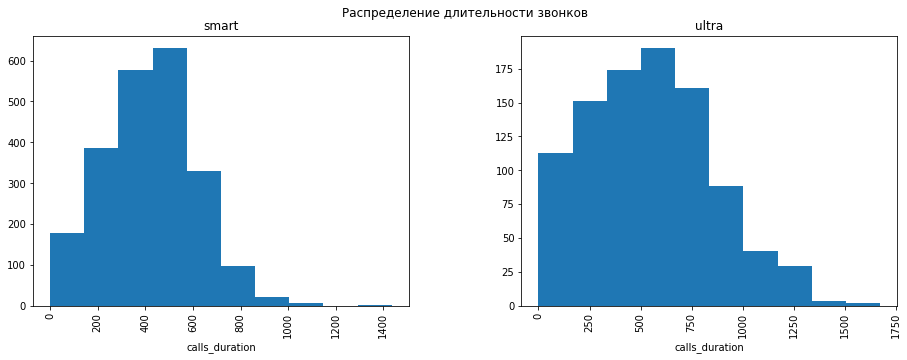

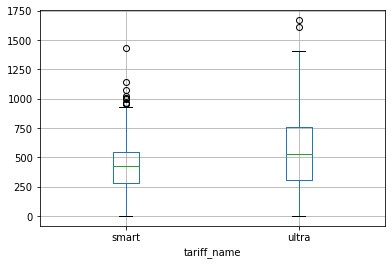

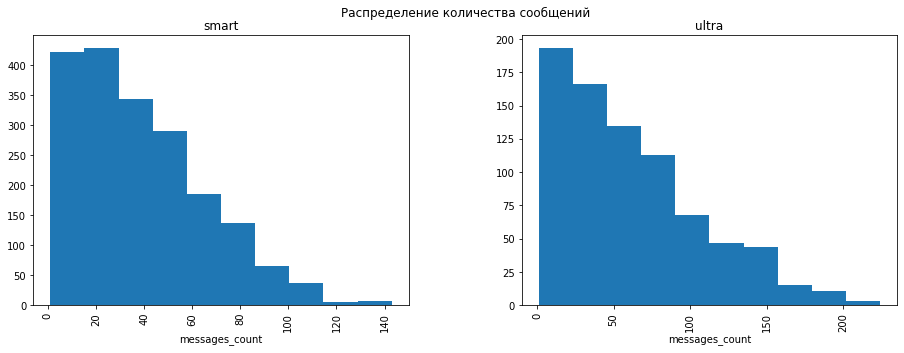

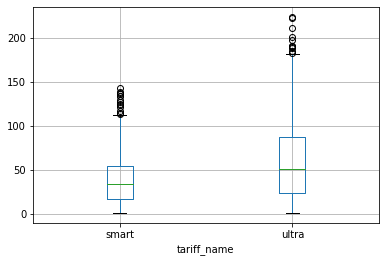

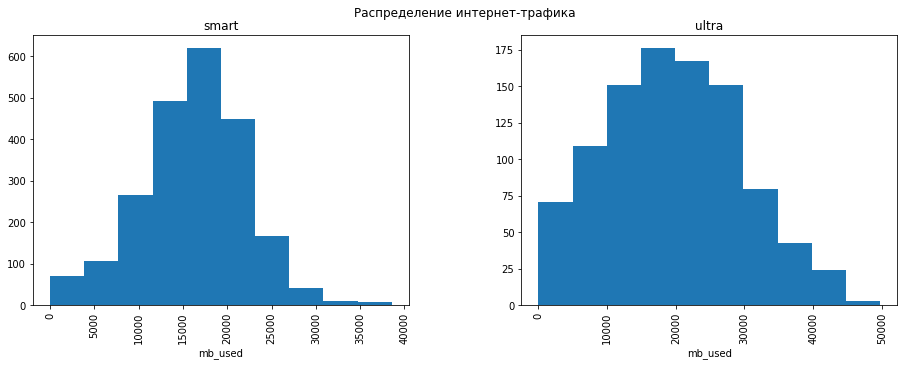

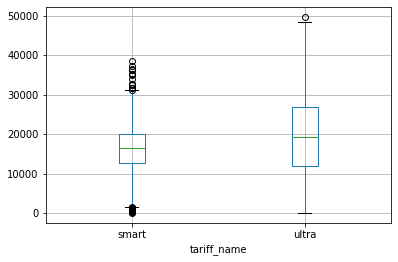

In [19]:
# Выключаем предупреждения по VisibleDeprecationWarning.
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# Наименевание нужных нам колонок
param = ['calls_duration','messages_count','mb_used']
# Наименования графиков
name = ['Распределение длительности звонков', 'Распределение количества сообщений', 'Распределение интернет-трафика']

# Для простоты создадим цикл, который будет проходить по нужным нам колонкам и строить графики 
for i in range(3):
    axarr = data.hist(column=param[i], by='tariff_name', figsize=(15,5), grid=True)
    # Цикл для подписи оси Х 2х графиков
    for ax in axarr.flatten():
        ax.set_xlabel(param[i])
    plt.suptitle(name[i])
    # Строим диаграмму размаха
    data.boxplot(column=param[i], by='tariff_name')
    # Убираем название диаграммы
    plt.suptitle('')
    plt.title('')

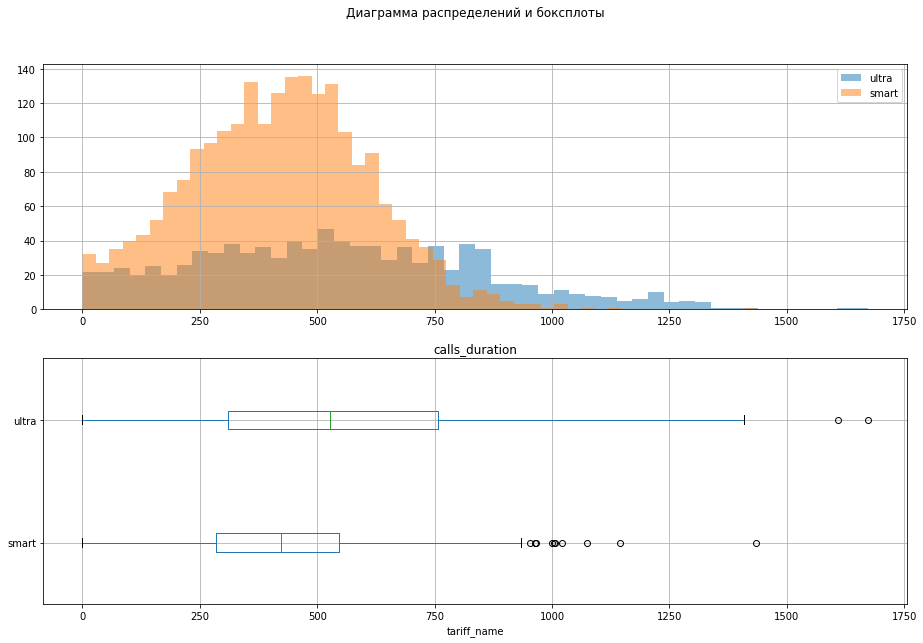

In [20]:
def plot_hist_boxplot(df, group_col, column, title = 'Диаграмма распределений и боксплоты', bins = [50, 50]):
    
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    for item in df[group_col].unique():
        axes[0].hist(df.loc[df[group_col] == item, column], bins = bins[0], label = item, alpha = 0.5)
    axes[0].legend()
    axes[0].grid()
    
    df.boxplot(column, by=group_col, ax = axes[1], vert = False)
    fig.suptitle(title)
    
    plt.show()
    
plot_hist_boxplot(data, 'tariff_name', 'calls_duration')

**Вывод**

Распределение длительности звонков.

Данные по обоим тарифам скошены вправо, при этом, исходя из характеристик тарифных планов, около 25% пользователей "Smart" докупают дополнительные минуты для разговора, в то время как пользователи "Ultra" умещаются в границы тарифа. В среднем звонок по тарифу "Smart" длится 400 секунд, по тарифу "Ultra" 500 сек.

Распределение количества сообщений.

Данные по обоим тарифам сильно скошены вправо, при этом, исходя из характеристик тарифных планов, около 25% пользователей "Smart" докупают дополнительные сообщения, в то время как пользователи "Ultra" не расходуют и четверти предложенного тарифом лимита. В среднем пользователи тарифа "Smart" отправляют 38 сообщений, по тарифу "Ultra" 61 сообщение.

Распределение интернет-трафика.

Можно сказать, что данные по тарифу "Smart" распеделены без смещений, в то время данные по тарифу "Ultra" имеют скос вправо, при этом, исходя из характеристик тарифных планов, около 50% пользователей "Smart" и 30% пользователей "Ultra" докупают дополнительные гигабайты. В среднем пользователи тарифа "Smart" тратят около 16 Гб на интернет, что больше чем предусмотрено тарифным планом, по тарифу "Ultra" пользователи тратят 19 Гб на интернет.

## Часть. Проверка гипотез.

### Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются". 

Рассмотрим следующую нулевую гипотезу - "средняя выручка пользователей тарифов "Ультра" и "Смарт" не различаются". Сформулируем альтернативную гипотезу - "средняя выручка пользователей тарифа "Ультра" и тарифа "Смарт" различаются". Для проверки гипотез создадим два датасета smart_data и ultra_data, в которых будем хранить выручку по каждому из тарифов.

In [21]:
# Датасет "Smart"
smart_data = data.query('tariff_name == "smart"')['revenue'].reset_index(drop=True)
display(smart_data)

# Датасет "Ultra"
ultra_data = data.query('tariff_name == "ultra"')['revenue'].reset_index(drop=True)
display(ultra_data)

0       1150
1        550
2        550
3       1150
4       1550
        ... 
2224    1750
2225     550
2226    1150
2227    1513
2228     598
Name: revenue, Length: 2229, dtype: int64

0      1950
1      1950
2      1950
3      1950
4      1950
       ... 
980    1950
981    2400
982    1950
983    3300
984    1950
Name: revenue, Length: 985, dtype: int64

Так как мы рассматриваем одностороннюю гипотезу, то воспользуемся  методом st.ttest_ind(), установим уровень значимости 5%.

In [22]:
# Устанавливаем уровень значимости
alpha = .05
# Применяем метод для сравнения средних
result = st.ttest_ind(smart_data, ultra_data, equal_var=False)
# Вывод p-value
print(result.pvalue)
# Вывод по гипотезе
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Вывод**

Средняя выручка от тарифов различается.

### Гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".

Рассмотрим следующую нулевую гипотезу - "средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов". Сформулируем альтернативную гипотезу - "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов". Для проверки гипотез создадим два датасета moscow_data и region_data, в которых будем хранить выручку по регионам.

In [23]:
# Датасет "Moscow"
moscow_data = data.query('city == "Москва"')['revenue'].reset_index(drop=True)
display(moscow_data)

# Датасет "Region"
region_data = data.query('city != "Москва"')['revenue'].reset_index(drop=True)
display(region_data)

0      1150
1       550
2      1950
3      1950
4      1950
       ... 
606     950
607     550
608    1750
609    1350
610     750
Name: revenue, Length: 611, dtype: int64

0       1950
1       1950
2       1950
3       1950
4       1950
        ... 
2598    1750
2599     550
2600    1150
2601    1513
2602     598
Name: revenue, Length: 2603, dtype: int64

Так как мы рассматриваем одностороннюю гипотезу, то воспользуемся методом st.ttest_ind(), установим уровень значимости 5%.

In [24]:
# Устанавливаем уровень значимости
alpha = .05
# Применяем метод для сравнения средних
result = st.ttest_ind(moscow_data, region_data, equal_var=False)
# Вывод p-value
print(result.pvalue)
# Вывод по гипотезе
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Гипотезу о том, что средняя выручка по Москве не отличается от средней выручке пользователей других регионов, не удалось опровергнуть.

## Часть. Подведение итогов.

### Общий вывод по исследованию.

В рамках проведенного исследования можно сказать, что средняя выручка от тарифа "Ultra" и тарифа "Smart" различаются, при этом в Москве средняя выручка на уровне регионов. 

Для ответа на вопрос "Какой тариф более прибыльный?" возможно стоит просто посчитать суммарную выручку по каждому тарифу (тариф "Smart" прибыльнее на 800 тыс.), оценить зависимость выбора тарифа от региона или например выдвинуть гипотезу "выручка по тарифу "Smart" выше, чем по аналогичному тарифу "Lite" у конкурентов" (с тарифом "Ultra" аналолгично).